In [1]:
 #set working directory
import os 
os.chdir('D:/DSC672_PAC/Final_Project/FinalFiles')
# \ is for Jupyter tensorflow notebook, / is for regular Jupyter notebook
#os.chdir('C:\\Users\\htran12\\Downloads')

In [2]:
import math
from math import sqrt

#numpy 
import numpy as np
from numpy import concatenate

#pandas
import pandas as pd
from pandas import to_datetime
from pandas import read_csv
from pandas import DataFrame
from pandas import concat

#matplotlib
from matplotlib import pyplot

#scipy
from scipy import stats

#sklearn
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.feature_selection import RFE, VarianceThreshold, SelectFromModel
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.externals import joblib
from sklearn.cluster import KMeans
from sklearn import metrics

#keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Embedding
from keras.layers import LSTM, GRU

#xgboost
import xgboost as xgb

#plotly
import plotly.express as px
import plotly.graph_objects as go

#time
import time

#seaborn
#import seaborn as sns

Using TensorFlow backend.


In [3]:
#set numpy print options
np.set_printoptions(suppress=True, precision=3, linewidth=120)

In [4]:
#import train data sets
solar_train = read_csv('solar_train.csv', index_col=False)
wind_train = read_csv('wind_train.csv', index_col=False)
food_train = read_csv('food_train.csv', index_col=False)
groc_train = read_csv('groc_train.csv', index_col=False)
heal_train = read_csv('heal_train.csv', index_col=False)
k12_train = read_csv('k12_train.csv', index_col=False)
lodg_train = read_csv('lodg_train.csv', index_col=False)
off_train = read_csv('off_train.csv', index_col=False)
res_train = read_csv('res_train.csv', index_col=False)
sar_train = read_csv('sar_train.csv', index_col=False)

In [5]:
#import test data sets
solar_test = read_csv('solar_test.csv', index_col=False)
wind_test = read_csv('wind_test.csv', index_col=False)
food_test = read_csv('food_test.csv', index_col=False)
groc_test = read_csv('groc_test.csv', index_col=False)
heal_test = read_csv('heal_test.csv', index_col=False)
k12_test = read_csv('k12_test.csv', index_col=False)
lodg_test = read_csv('lodg_test.csv', index_col=False)
off_test = read_csv('off_test.csv', index_col=False)
res_test = read_csv('res_test.csv', index_col=False)
sar_test = read_csv('sar_test.csv', index_col=False)

In [6]:
#set rand state
rand = 3

#### ONLY for Neural nets, if not training Neural nets, SKIP to cell after End dashed line

#### ------------------------------------------------------------------- Start -------------------------------------------------------------------

In [92]:
#select features to drop from Wind train/test sets
headers = list(heal_train.columns)
col_drop = headers[9:46]
#col_drop1 = headers[3]
#col_drop2 = headers[-4:]
#col_drop.append(col_drop1)    #extend() when col_drop1 has more than 1 feature/append() when col_drop1 has 1 feature
#col_drop.extend(col_drop2)
print(col_drop[0])       #first column to drop
print(col_drop[-2])      #second last column to drop
print(col_drop[-1])      #last column to drop

Month_1
Day_of_week_5
Day_of_week_6


In [93]:
#drop features
heal_tr_nn = heal_train.drop(columns = col_drop)
heal_tt_nn = heal_test.drop(columns = col_drop)

In [94]:
#convert dataframe to numpy
heal_tr_nn = heal_tr_nn.to_numpy(dtype ='float32', copy=True)
heal_tt_nn = heal_tt_nn.to_numpy(dtype ='float32', copy=True)

In [95]:
#input data and target for train/test
heal_x = heal_tr_nn[:,1:] 
heal_y = heal_tr_nn[:,0]       #target variable

heal_tx = heal_tt_nn[:,1:]
heal_ty = heal_tt_nn[:,0]      #target variable

In [96]:
#check base - Train
print('train input:', len(heal_x))
print('train target:', len(heal_y))
print('\n')

#check base - Test
print('test input:', len(heal_tx))
print('test target:', len(heal_ty))

train input: 292
train target: 292


test input: 73
test target: 73


#### ------------------------------------------------------------------- End -------------------------------------------------------------------

In [46]:
#convert pandas frame to numpy frame
sar_tr = sar_train.to_numpy(dtype ='float32', copy=True)
sar_tt = sar_test.to_numpy(dtype ='float32', copy=True)

In [21]:
#view data as pandas frame
heal_train[:1]

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Temperature_AVG,Visibility_AVG,Month_1,...,Day_29,Day_31,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Season_Spring,Season_Winter
0,2969.613377,1,0,0,-14.264263,0.270833,-7.075,-2.75,18.033333,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#input data and target - Train
sar_x = sar_tr[:,1:] 
sar_y = sar_tr[:,0]        #target variable

#input data and target - Test
sar_tx = sar_tt[:,1:]
sar_ty = sar_tt[:,0]        #target variable

In [10]:
#check base - Train
print('train input:', len(food_x))
print('train target:', len(food_y))
print('\n')

#check base - Test
print('test input:', len(food_tx))
print('test target:', len(food_ty))

train input: 292
train target: 292


test input: 73
test target: 73


### Normalization/Scaling of input data

In [28]:
scaler = StandardScaler()
scaler.fit(food_x)

food_x_norm = scaler.fit_transform(food_x)
food_tx_norm = scaler.fit_transform(food_tx)         #should we scale test input data ???           

### Decision tree

In [52]:
#Regressors (Use train and test sets)

#SciKit Decision Tree Regressor
start_ts=time.time()
rgr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=rand)
rgr.fit(food_x, food_y)

scores_RMSE = math.sqrt(metrics.mean_squared_error(food_ty, rgr.predict(food_tx)))
print('Decision Tree RMSE:', scores_RMSE)
scores_Expl_Var = metrics.explained_variance_score(food_ty, rgr.predict(food_tx))
print('Decistion Tree Expl Var:', scores_Expl_Var)
print("CV Runtime:", time.time()-start_ts)

Decision Tree RMSE: 82.22231517482074
Decistion Tree Expl Var: 0.9698556541931828
CV Runtime: 0.012967348098754883


In [162]:
#Regressors(Use train and test sets)

#SciKit Bagging Regressor
start_ts=time.time()
rgr = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=3, min_samples_leaf=1, max_features=None, random_state=rand)  
bag = BaggingRegressor(max_samples = 0.8, random_state = rand) 
bag.fit(sar_x, sar_y) 

scores_RMSE = math.sqrt(metrics.mean_squared_error(sar_ty, bag.predict(sar_tx))) 
print('Decision Tree RMSE:', scores_RMSE) 
scores_Expl_Var = metrics.explained_variance_score(sar_ty, bag.predict(sar_tx))  
print('Decistion Tree Expl Var:', scores_Expl_Var) 
print("CV Runtime:", time.time()-start_ts)

Decision Tree RMSE: 36.52632660217761
Decistion Tree Expl Var: 0.9841710257222684
CV Runtime: 0.027890443801879883


In [ ]:
#Cross-Val Regressors (Use original dataset, before splitting train/test)

#Setup Crossval regression scorers
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 

#SciKit Decision Tree Regressor - Cross Val
start_ts=time.time()
rgr = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=rand_st)
scores = cross_validate(rgr, data_np, target_np, scoring=scorers, cv=5)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                                                        #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Decision Tree RMSE:: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Decision Tree Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

#### Use Decision tree features importances to drop features for NN model

In [106]:
#get score of Decision Tree regressor model (when using all features)
rgr.fit(sar_x, sar_y)
rgr.score(sar_tx, sar_ty)

0.9346913115248753

In [ ]:
#features importances 
sar_x_cols = list(sar_train.columns)[1:]       #when using all features in Decision Tree
feature_importances = pd.DataFrame(rgr.feature_importances_,
                                   index = sar_x_cols,
                                   columns=['importance']).sort_values('importance', ascending=False)
#top 20 features
top_feat = []
for row in feature_importances[:20].index:
    top_feat.append(row)

top_feat

In [87]:
#drop for NN
col_drop = []
for col in sar_x_cols:
    if col not in top_feat: 
        col_drop.append(col)

col_drop #then go back to the first part of this codebook to drop features

['School_Day',
 'Dew_Point_AVG',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Day_3',
 'Day_4',
 'Day_6',
 'Day_7',
 'Day_10',
 'Day_11',
 'Day_14',
 'Day_15',
 'Day_16',
 'Day_23',
 'Day_24',
 'Day_25',
 'Day_29',
 'Day_of_week_3',
 'Day_of_week_5',
 'Season_Summer',
 'Season_Winter']

### Random forests

In [69]:
#Regressors (Use train and test sets)

#SciKit Random Forests Regressor
start_ts=time.time()
rgr = RandomForestRegressor(n_estimators = 410, max_features = 0.7, min_samples_split = 3, random_state = rand)
rgr.fit(sar_x, sar_y)

scores_RMSE = math.sqrt(metrics.mean_squared_error(sar_ty, rgr.predict(sar_tx)))
print('Random Forests RMSE:', scores_RMSE)
scores_Expl_Var = metrics.explained_variance_score(sar_ty, rgr.predict(sar_tx))
print('Random Forests Expl Var:', scores_Expl_Var)
print("CV Runtime:", time.time()-start_ts)

Random Forests RMSE: 51.12293002737546
Random Forests Expl Var: 0.9691324458126198
CV Runtime: 0.5425472259521484


#### Use Random forests features importances to drop features for NN model

In [59]:
#get score of Decision Tree regressor model (when using all features)
rgr.score(heal_tx, heal_ty)

0.9181698198844512

In [70]:
#features importances 
sar_x_cols = list(sar_train.columns)[1:]       #when using all features in Random forests
feature_importances = pd.DataFrame(rgr.feature_importances_,
                                   index = sar_x_cols,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances.head()

,importance
Day_of_week_1,0.485298
Temperature_AVG,0.260566
Dew_Point_AVG,0.073078
Weekend,0.072154
Holiday,0.051193


In [50]:
#top 36 features (total featues * max_features = 60*0.6)
top_feat = []
for row in feature_importances[:36].index:
    top_feat.append(row)

top_feat

['Day_of_week_1',
 'Temperature_AVG',
 'Dew_Point_AVG',
 'Weekend',
 'Holiday',
 'Solar_Elevation_AVG',
 'Visibility_AVG',
 'Cloud_Cover_Fraction_AVG',
 'Day_of_week_6',
 'Day_11',
 'Day_4',
 'School_Day',
 'Month_7',
 'Month_5',
 'Day_14',
 'Day_18',
 'Day_10',
 'Month_4',
 'Month_8',
 'Day_29',
 'Day_25',
 'Season_Winter',
 'Day_of_week_5',
 'Month_9',
 'Day_17',
 'Day_of_week_3',
 'Day_15',
 'Month_2',
 'Day_16',
 'Day_7',
 'Day_31',
 'Day_6',
 'Day_27',
 'Day_26',
 'Month_1',
 'Month_12']

In [27]:
#drop for NN
col_drop = []
for col in solar_x_cols:
    if col not in top_feat: 
        col_drop.append(col)

col_drop #then go back to the first part of this codebook to drop features

['Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Day_1',
 'Day_2',
 'Day_3',
 'Day_7',
 'Day_8',
 'Day_9',
 'Day_11',
 'Day_13',
 'Day_15',
 'Day_16',
 'Day_17',
 'Day_19',
 'Day_21',
 'Day_25',
 'Day_26',
 'Day_27',
 'Day_30',
 'Day_31',
 'Season_Summer']

In [ ]:
#Cross-Val Regressors (Use original dataset, before splitting train/test)

#Setup Crossval regression scorers
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
    
#SciKit Random Forest Regressor - Cross Val
start_ts=time.time()
rgr = RandomForestRegressor(n_estimators = 100, max_features = 0.33, max_depth = None, min_samples_split = 3, random_state = rand)   
scores = cross_validate(estimator = rgr, X = data_np, y = target_np, scoring = scorers, cv = 5)  

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Random Forest RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Random Forest Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

### SVM for Regression

In [21]:
#Regressors (Use train and test sets)
    
#SciKit SVM 
start_ts=time.time()
rgr=SVR(kernel='linear', gamma='auto')
rgr.fit(solar_x, solar_y)                                                                                               

scores_RMSE = math.sqrt(metrics.mean_squared_error(solar_ty, rgr.predict(solar_tx)))
print('SVM RMSE:', scores_RMSE)
scores_Expl_Var = metrics.explained_variance_score(solar_ty, rgr.predict(solar_tx))
print('SVM Expl Var:', scores_Expl_Var)
print("CV Runtime:", time.time()-start_ts)

SVM RMSE: 30198.39415291634
SVM Expl Var: 0.24617846895790307
CV Runtime: 0.14963221549987793


In [ ]:
#Cross-Val Regressors (Use original dataset, before splitting train/test)

#Setup Crossval regression scorers
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
    
#SciKit SVM - Cross Val
start_ts=time.time()
rgr=SVR(kernel='linear',gamma=0.1,C=1.0)
scores=cross_validate(estimator = rgr, X = data_np, y = target_np, scoring = scorers, cv = 5)                                                                                                

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("SVM RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("SVM Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts)

### Neural nets

In [109]:
#Regressors (Use train and test sets)
    
#SciKit SVM 
start_ts=time.time()
rgr=MLPRegressor(activation = 'identity', solver = 'lbfgs', alpha = 0.0001, max_iter = 10000, 
                 hidden_layer_sizes = (10,), random_state = rand)
rgr.fit(heal_x, heal_y)                                                                                                

scores_RMSE = math.sqrt(metrics.mean_squared_error(heal_ty, rgr.predict(heal_tx)))
print('Neural Net RMSE:', scores_RMSE)
scores_Expl_Var = metrics.explained_variance_score(heal_ty, rgr.predict(heal_tx))
print('Neural Net Expl Var:', scores_Expl_Var)
print("CV Runtime:", time.time()-start_ts)

Neural Net RMSE: 188.95481631421802
Neural Net Expl Var: 0.8888234171206553
CV Runtime: 0.3151276111602783


In [ ]:
#Cross-Val Regressors (Use original dataset, before splitting train/test)

#Setup Crossval regression scorers
scorers = {'Neg_MSE': 'neg_mean_squared_error', 'expl_var': 'explained_variance'} 
    
#SciKit Neural Network - Cross Val
start_ts=time.time()
rgrNN= MLPRegressor(activation = 'logistic', solver = 'adam', alpha = 0.001, max_iter = 1000, 
                    hidden_layer_sizes = (100,), learning_rate = 'adaptive', random_state = rand)
scores= cross_validate(estimator = rgrNN, X = data_np, y = target_np, scoring = scorers, cv = 5)

scores_RMSE = np.asarray([math.sqrt(-x) for x in scores['test_Neg_MSE']])                                       #Turns negative MSE scores into RMSE
scores_Expl_Var = scores['test_expl_var']
print("Neural Network RMSE: %0.2f (+/- %0.2f)" % ((scores_RMSE.mean()), (scores_RMSE.std() * 2)))
print("Neural Network Expl Var: %0.2f (+/- %0.2f)" % ((scores_Expl_Var.mean()), (scores_Expl_Var.std() * 2)))
print("CV Runtime:", time.time()-start_ts) 

### Use models trained to predict values using test sets

#### Wind

In [18]:
headers = list(wind_test.columns)
col_drop = headers[2:]
#col_drop1 = headers[3:]
#col_drop.extend(col_drop1)

print(col_drop[0])
print(col_drop[-1])

Month_1
Season_Winter


In [19]:
wind_test = wind_test.drop(columns = col_drop)

In [25]:
wind_test_y = pd.DataFrame(wind_test, columns=['Electricity_KW_HR_AVG'])
wind_test_x = pd.DataFrame(wind_test, columns=['Wind_Speed_AVG'])

In [26]:
wind_test_x[:3]

,Wind_Speed_AVG
0,3.833333
1,6.933333
2,3.750000


In [27]:
#use model trained to predict electrical production for test set
wind_nn = rgr.predict(wind_test_x)

In [29]:
wind_predicted = pd.DataFrame(wind_nn, columns=['Predicted'])
wind_predicted['Actual'] = wind_test_y['Electricity_KW_HR_AVG']

In [32]:
wind_predicted['Diff'] = wind_predicted['Predicted'] - wind_predicted['Actual']
wind_predicted[:3]

,Predicted,Actual,Diff
0,2421.442398,2575.500000,-154.057602
1,16156.801606,20087.833330,-3931.031724
2,2374.711567,3447.666667,-1072.955100


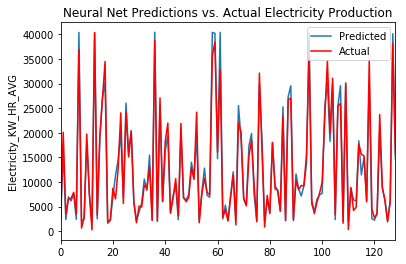

In [41]:
#plot line chart 
ax = pyplot.gca()

wind_predicted.plot(kind='line', y='Predicted',ax=ax)
wind_predicted.plot(kind='line', y='Actual', color='red', ax=ax)
pyplot.title('Neural Net Predictions vs. Actual Electricity Production')
pyplot.ylabel('Electricity_KW_HR_AVG')
pyplot.legend()
pyplot.savefig("NN.png", bbox_inches='tight')

pyplot.show()

#### Solar

In [43]:
solar_test[:3]

,Electricity_KW_HR_AVG,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Precipitation_AVG,Temperature_AVG,Visibility_AVG,Wind_Speed_AVG,Month_1,...,Day_of_week_1,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,13437.63687,17.338394,1.000000,2.780000e-17,0.815225,0.0375,2.850000,11.063875,5.012500,0,...,0,0,0,0,0,1,1,0,0,0
1,58666.80182,29.373761,0.627273,5.200000e+00,0.656927,0.0000,11.618182,16.093000,4.381818,0,...,1,0,0,0,0,0,1,0,0,0
2,105304.03170,35.447798,0.000000,1.462500e+01,0.552750,0.0000,24.766667,16.093000,5.783333,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
solar_test_y_cols = list(solar_test)[1:]
solar_test_y_cols

['Solar_Elevation_AVG',
 'Cloud_Cover_Fraction_AVG',
 'Dew_Point_AVG',
 'Humidity_Fraction_AVG',
 'Precipitation_AVG',
 'Temperature_AVG',
 'Visibility_AVG',
 'Wind_Speed_AVG',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_11',
 'Month_12',
 'Day_1',
 'Day_2',
 'Day_3',
 'Day_4',
 'Day_5',
 'Day_6',
 'Day_7',
 'Day_8',
 'Day_9',
 'Day_11',
 'Day_12',
 'Day_13',
 'Day_14',
 'Day_15',
 'Day_16',
 'Day_17',
 'Day_18',
 'Day_19',
 'Day_20',
 'Day_21',
 'Day_22',
 'Day_23',
 'Day_24',
 'Day_25',
 'Day_26',
 'Day_27',
 'Day_28',
 'Day_29',
 'Day_30',
 'Day_31',
 'Day_of_week_1',
 'Day_of_week_2',
 'Day_of_week_3',
 'Day_of_week_4',
 'Day_of_week_6',
 'Day_of_week_7',
 'Season_Autumn',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter']

In [45]:
solar_test_x = pd.DataFrame(solar_test, columns=solar_test_y_cols)
solar_test_y = pd.DataFrame(solar_test, columns=['Electricity_KW_HR_AVG'])

In [46]:
#use model trained to predict electrical production for test set
solar_rf = rgr.predict(solar_test_x)

In [47]:
solar_predicted = pd.DataFrame(solar_rf, columns=['Predicted'])
solar_predicted['Actual'] = solar_test_y['Electricity_KW_HR_AVG']

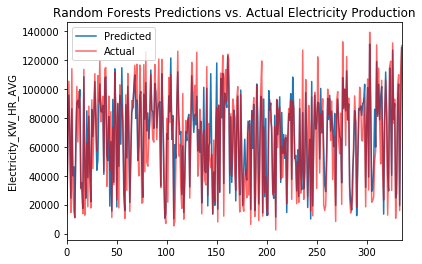

In [52]:
#plot line chart 
ax = pyplot.gca()

solar_predicted.plot(kind='line', y='Predicted',ax=ax)
solar_predicted.plot(kind='line', y='Actual', color='red', alpha=0.6, ax=ax)
pyplot.title('Random Forests Predictions vs. Actual Electricity Production')
pyplot.ylabel('Electricity_KW_HR_AVG')
pyplot.legend()
pyplot.savefig("RF_SOLAR.png", bbox_inches='tight')

pyplot.show()

#### Consumption Sectors

In [138]:
print(col_drop[0])
print(col_drop[-2])
print(col_drop[-1])

Day_1
Day_of_week_6
Day_of_week_7


In [139]:
food_test = food_test.drop(columns = col_drop)

In [140]:
food_test[:3]

,Electricity_KW_AVG,Weekend,Holiday,School_Day,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Precipitable_Water_AVG,Temperature_AVG,Visibility_AVG,...,Month_6,Month_7,Month_8,Month_9,Month_10,Month_12,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,8050.762123,0,0,1,7.580548,0.991667,6.329167,16.083333,7.866667,12.058333,...,0,0,0,0,0,0,0,1,0,0
1,8199.111356,1,0,0,-16.976956,0.962500,4.983333,14.291667,6.929167,12.425000,...,0,0,0,0,0,0,1,0,0,0
2,8182.295922,0,0,0,7.680852,0.920833,13.320833,23.750000,15.770833,12.500000,...,0,0,1,0,0,0,0,0,1,0


In [141]:
food_test_y_cols = list(food_test)[1:]
food_test_y_cols

['Weekend',
 'Holiday',
 'School_Day',
 'Solar_Elevation_AVG',
 'Cloud_Cover_Fraction_AVG',
 'Dew_Point_AVG',
 'Precipitable_Water_AVG',
 'Temperature_AVG',
 'Visibility_AVG',
 'Month_1',
 'Month_2',
 'Month_4',
 'Month_5',
 'Month_6',
 'Month_7',
 'Month_8',
 'Month_9',
 'Month_10',
 'Month_12',
 'Season_Autumn',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter']

In [142]:
food_test_x = pd.DataFrame(food_test, columns=food_test_y_cols)
food_test_y = pd.DataFrame(food_test, columns=['Electricity_KW_AVG'])

In [143]:
#use model trained to predict electrical production for test set
food_nn = rgr.predict(food_test_x)

In [144]:
food_predicted = pd.DataFrame(food_nn, columns=['Predicted'])
food_predicted['Actual'] = food_test_y['Electricity_KW_AVG']

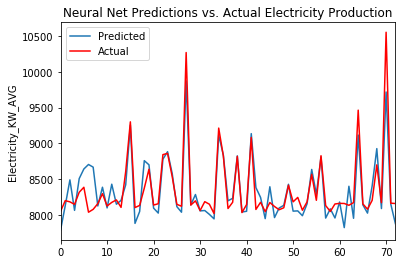

In [145]:
#plot line chart 
ax = pyplot.gca()

food_predicted.plot(kind='line', y='Predicted',ax=ax)
food_predicted.plot(kind='line', y='Actual', color='red', ax=ax)
pyplot.title('Neural Net Predictions vs. Actual Electricity Production')
pyplot.ylabel('Electricity_KW_AVG')
pyplot.legend()
pyplot.savefig("NN_FOOD.png", bbox_inches='tight')

pyplot.show()

### Use models trained to predict Consumption using Scenario data

In [57]:
#import Scenario datasets
solar_sce = read_csv('solar_scenario.csv', index_col=False)
wind_sce = read_csv('wind_scenario.csv', index_col=False)
food_sce = read_csv('food_scenario.csv', index_col=False)
groc_sce = read_csv('groc_scenario.csv', index_col=False)
heal_sce = read_csv('heal_scenario.csv', index_col=False)
k12_sce = read_csv('k12_scenario.csv', index_col=False)
lodg_sce = read_csv('lodg_scenario.csv', index_col=False)
off_sce = read_csv('off_scenario.csv', index_col=False)
res_sce = read_csv('res_scenario.csv', index_col=False)
sar_sce = read_csv('sar_scenario.csv', index_col=False)

In [60]:
#get dates from Consumption scenario data
date_col = food_sce['Date_Time']

In [88]:
date_col[:3]

0    01/01/91
1    01/02/91
2    01/03/91
Name: Date_Time, dtype: object

In [61]:
food_sce = food_sce.drop(columns=['Date_Time'])
groc_sce = groc_sce.drop(columns=['Date_Time'])
heal_sce = heal_sce.drop(columns=['Date_Time'])
k12_sce = k12_sce.drop(columns=['Date_Time'])
lodg_sce = lodg_sce.drop(columns=['Date_Time'])
off_sce = off_sce.drop(columns=['Date_Time'])
res_sce = res_sce.drop(columns=['Date_Time'])
sar_sce = sar_sce.drop(columns=['Date_Time'])

In [79]:
#Rerun model for each of 8 sectors
rgr = RandomForestRegressor(n_estimators = 410, max_features = 0.7, min_samples_split = 3, random_state = rand)
rgr.fit(sar_x, sar_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.7, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=410, n_jobs=None,
           oob_score=False, random_state=3, verbose=0, warm_start=False)

In [64]:
food_preds = rgr.predict(food_sce)

In [67]:
groc_preds = rgr.predict(groc_sce)

In [70]:
heal_preds = rgr.predict(heal_sce)

In [72]:
k12_preds = rgr.predict(k12_sce)

In [74]:
lodg_preds = rgr.predict(lodg_sce)

In [76]:
off_preds = rgr.predict(off_sce)

In [78]:
res_preds = rgr.predict(res_sce)

In [80]:
sar_preds = rgr.predict(sar_sce)

In [93]:
date = pd.date_range(start='1/1/1991', periods=len(date_col), freq='D')
cons_preds = pd.DataFrame(data=date,columns=['Date'])

In [94]:
cons_preds['food'] = food_preds
cons_preds['groc'] = groc_preds
cons_preds['heal'] = heal_preds
cons_preds['k12'] = k12_preds
cons_preds['lodg'] = lodg_preds
cons_preds['off'] = off_preds
cons_preds['res'] = res_preds
cons_preds['sar'] = sar_preds

In [95]:
cons_preds[:3]

,Date,food,groc,heal,k12,lodg,off,res,sar
0,1991-01-01,8173.612688,1893.913216,3613.080173,2880.500624,1353.535334,17343.477515,62042.389154,1138.628554
1,1991-01-02,8167.324305,2064.857384,3355.436964,3723.808706,1435.034442,25631.594845,63272.146877,1492.348711
2,1991-01-03,8165.271378,2066.868242,3233.368489,3666.077448,1561.987816,25708.136973,64457.735595,1500.469203


In [96]:
cons_preds.shape

(364, 9)

In [97]:
cons_preds['Total'] = cons_preds.sum(axis = 1, skipna = True)

In [98]:
cons_preds[:3]

,Date,food,groc,heal,k12,lodg,off,res,sar,Total
0,1991-01-01,8173.612688,1893.913216,3613.080173,2880.500624,1353.535334,17343.477515,62042.389154,1138.628554,98439.137259
1,1991-01-02,8167.324305,2064.857384,3355.436964,3723.808706,1435.034442,25631.594845,63272.146877,1492.348711,109142.552234
2,1991-01-03,8165.271378,2066.868242,3233.368489,3666.077448,1561.987816,25708.136973,64457.735595,1500.469203,110359.915144


In [99]:
export = cons_preds.to_csv (r'D:/DSC672_PAC/Final_Project/ConsPreds.csv', index = None, header=True)

## Neural nets by Keras

In [12]:
#function to convert time-series data to supervised learning dataframes 
#this function code is borrowed from this sorce:
#https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [17]:
os.chdir('D:/DSC672_PAC/Final_Project/Daily_Agg')

In [19]:
#import aggregated wind data (before feature selection, shuffle and split were performed to split train/test)
solar_tr_nn = read_csv('solar_agg.csv', index_col=False)

In [21]:
solar_tr_nn[:2]

,Weekend,Electricity_KW_HR_AVG,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Precipitation_AVG,Pressure_AVG,Temperature_AVG,Visibility_AVG,...,Day_of_week_2,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,0,10042.0800,13.121416,1.0,-8.3,0.6984,0.0,0.0,-3.600,16.09300,...,1,0,0,0,0,0,0,0,0,1
1,0,13925.2625,16.887491,1.0,-7.0,0.7894,0.0,0.0,-3.875,15.08725,...,0,1,0,0,0,0,0,0,0,1


In [150]:
#select vars to drop
#headers = list(solar_tr_nn.columns)
#col_drop = headers[:2]
#col_drop1 = headers[4:]
#col_drop.extend(col_drop1)

#print(col_drop[0])       #first column to drop
#print(col_drop[-1])      #last column to drop

Date_Time
Season_Winter


In [151]:
#drop columns selected above
#wind_tr_nn = wind_tr_nn.drop(columns = col_drop)

In [152]:
#switch column positions
#cols = wind_tr_nn.columns.tolist()
#cols = cols[-1:] + cols[:-1]
#wind_tr_nn = wind_tr_nn[cols]
#wind_tr_nn[:3]

In [22]:
#place column Electricity_KW_HR_AVG to the last column
last_col = solar_tr_nn['Electricity_KW_HR_AVG']
solar_tr_nn = solar_tr_nn.drop(columns = ['Electricity_KW_HR_AVG'])
solar_tr_nn['Electricity_KW_HR_AVG'] = last_col

In [23]:
solar_tr_nn[:2]

,Weekend,Solar_Elevation_AVG,Cloud_Cover_Fraction_AVG,Dew_Point_AVG,Humidity_Fraction_AVG,Precipitation_AVG,Pressure_AVG,Temperature_AVG,Visibility_AVG,Wind_Speed_AVG,...,Day_of_week_3,Day_of_week_4,Day_of_week_5,Day_of_week_6,Day_of_week_7,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Electricity_KW_HR_AVG
0,0,13.121416,1.0,-8.3,0.6984,0.0,0.0,-3.600,16.09300,4.65,...,0,0,0,0,0,0,0,0,1,10042.0800
1,0,16.887491,1.0,-7.0,0.7894,0.0,0.0,-3.875,15.08725,4.25,...,1,0,0,0,0,0,0,0,1,13925.2625


In [154]:
#using series_to_supervised(), frame as supervised learning, with 24-hour timesteps
solar_reframed = series_to_supervised(solar_tr_nn, 24, 1)
solar_reframed.shape

In [155]:
wind_reframed[:3]

,var1(t-24),var2(t-24),var1(t-23),var2(t-23),var1(t-22),var2(t-22),var1(t-21),var2(t-21),var1(t-20),var2(t-20),...,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
24,3.308333,2145.666667,4.987500,6650.666667,4.391667,4763.166667,3.808333,2943.000000,3.383333,2342.166667,...,2.129167,407.500000,3.629167,2409.833333,2.766667,1675.666667,3.279167,2528.833333,4.145833,4262.333333
25,4.987500,6650.666667,4.391667,4763.166667,3.808333,2943.000000,3.383333,2342.166667,5.758333,6316.833333,...,3.629167,2409.833333,2.766667,1675.666667,3.279167,2528.833333,4.145833,4262.333333,4.470833,6599.333333
26,4.391667,4763.166667,3.808333,2943.000000,3.383333,2342.166667,5.758333,6316.833333,9.175000,17087.000000,...,2.766667,1675.666667,3.279167,2528.833333,4.145833,4262.333333,4.470833,6599.333333,3.537500,2592.000000


In [157]:
#drop column(s) of var(s) that we don't want to predict
drop = []
nn_headers = list(wind_reframed.columns)
cols = (nn_headers[-2])
drop.append(cols)
drop

['var1(t)']

In [158]:
wind_reframed = wind_reframed.drop(columns = drop)
wind_reframed[:3]

,var1(t-24),var2(t-24),var1(t-23),var2(t-23),var1(t-22),var2(t-22),var1(t-21),var2(t-21),var1(t-20),var2(t-20),...,var2(t-5),var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var2(t)
24,3.308333,2145.666667,4.987500,6650.666667,4.391667,4763.166667,3.808333,2943.000000,3.383333,2342.166667,...,3598.833333,2.129167,407.500000,3.629167,2409.833333,2.766667,1675.666667,3.279167,2528.833333,4262.333333
25,4.987500,6650.666667,4.391667,4763.166667,3.808333,2943.000000,3.383333,2342.166667,5.758333,6316.833333,...,407.500000,3.629167,2409.833333,2.766667,1675.666667,3.279167,2528.833333,4.145833,4262.333333,6599.333333
26,4.391667,4763.166667,3.808333,2943.000000,3.383333,2342.166667,5.758333,6316.833333,9.175000,17087.000000,...,2409.833333,2.766667,1675.666667,3.279167,2528.833333,4.145833,4262.333333,4.470833,6599.333333,2592.000000


In [159]:
wind_t, wind_v = train_test_split(wind_reframed, test_size=0.2, random_state=rand)

#split train and validation data into input and output
train_values = wind_t.values  
valid_values = wind_v.values

x_train, y_train = train_values[:, :-1], train_values[:, -1]
x_valid, y_valid = valid_values[:, :-1], valid_values[:, -1]

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(494, 48) (494,)
(124, 48) (124,)


In [160]:
# Reshape train/valid input data to be Keras-ready format [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 24, 2))
x_valid = x_valid.reshape((x_valid.shape[0], 24, 2))
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(494, 24, 2) (494,)
(124, 24, 2) (124,)


In [193]:
# design neural net 
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'relu'))  #activations tried: linear, sigmoid, tanh, softmax, relu

model.compile(loss='mse', 
              optimizer='adam', 
              metrics=['mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_25 (LSTM)               (None, 24, 150)           91800     
_________________________________________________________________
dropout_19 (Dropout)         (None, 24, 150)           0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 24, 300)           541200    
_________________________________________________________________
dropout_20 (Dropout)         (None, 24, 300)           0         
_________________________________________________________________
lstm_27 (LSTM)               (None, 300)               721200    
_________________________________________________________________
dropout_21 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 301       
Total para

In [201]:
#fit network
history = model.fit(x_train, y_train, 
                    epochs=50,
                    batch_size=30,
                    verbose=2, 
                    shuffle=False, 
                    validation_data=(x_valid, y_valid))

Train on 494 samples, validate on 124 samples
Epoch 1/50
 - 11s - loss: 258619485.7976 - mean_absolute_error: 12404.5854 - val_loss: 257063194.0645 - val_mean_absolute_error: 11643.3653
Epoch 2/50
 - 2s - loss: 258571669.8947 - mean_absolute_error: 12402.6572 - val_loss: 257027001.0323 - val_mean_absolute_error: 11641.8003
Epoch 3/50
 - 2s - loss: 258533012.6964 - mean_absolute_error: 12401.0987 - val_loss: 256994521.2903 - val_mean_absolute_error: 11640.4154
Epoch 4/50
 - 2s - loss: 258501915.3684 - mean_absolute_error: 12399.8458 - val_loss: 256965421.9355 - val_mean_absolute_error: 11639.1654
Epoch 5/50
 - 2s - loss: 258470344.5830 - mean_absolute_error: 12398.5727 - val_loss: 256935669.1613 - val_mean_absolute_error: 11637.8856
Epoch 6/50
 - 2s - loss: 258437546.2996 - mean_absolute_error: 12397.2499 - val_loss: 256903899.0968 - val_mean_absolute_error: 11636.5230
Epoch 7/50
 - 3s - loss: 258405080.9717 - mean_absolute_error: 12395.9409 - val_loss: 256874237.9355 - val_mean_absolut

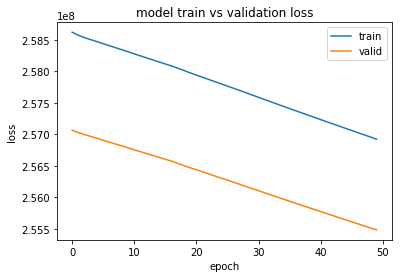

In [202]:
# plot history of loss for train and valid sets 
# activation = linear, batch_size = 30 (30 is better than 100)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='valid')
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend()
pyplot.savefig("linear_activ.png", bbox_inches='tight')
pyplot.show()